In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([4.6, 6.0, 2.0, 5.8])
sigma = np.array([2.0, 1.5, 5.0, 1.0])

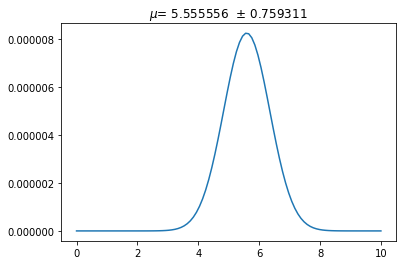

In [3]:
Nmu = 100
mu = np.linspace(0,10,Nmu)

p_xk_mu = np.zeros([np.shape(x)[0],Nmu])
for i in range(Nmu):
    p_xk_mu[:,i] = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-0.5*((x - mu[i])**2)/(sigma**2))

p_mu = 1/(np.max(mu)-np.min(mu))
p_x = np.trapz(x)
p_mu_kx = np.prod(p_xk_mu, axis = 0)*p_mu/p_x

L = np.sum(np.log(p_xk_mu), axis = 0)

arg_max = np.argmax(L)

d2L_dmu2 = (L[arg_max+1] - 2*L[arg_max] + L[arg_max-1]) / ((mu[1]-mu[0])**2)

plt.plot(mu,p_mu_kx)
plt.title('$\mu $= %f  $\pm$ %f'%(mu[arg_max],(-d2L_dmu2)**(-0.5)) )
plt.savefig('mean.pdf')

In [4]:
L[arg_max+1]

-6.82725233809281

In [5]:
 2*L[arg_max]

-13.649103866744408

In [6]:
 L[arg_max-1]

-6.839548135573793

In [7]:
d2L_dmu2

-1.734444444444342

In [8]:
p_x

13.200000000000001

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


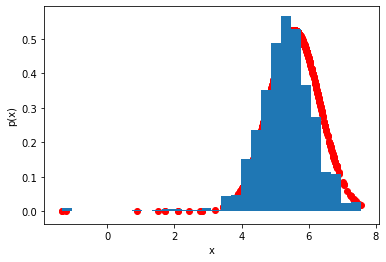

In [25]:
x_walk = 4 #this is an empty list to keep all the steps
x_0 = 8.0*((np.random.random())-0.5) #this is the initialization
x_walk = np.append(x_walk,x_0)


max, sigma = mu[arg_max],(-d2L_dmu2)**(-0.5)
def nasty_function(H, max,sigma):

    return (1.0/np.sqrt(2.0*np.pi*sigma**2))*np.exp(-0.5*(H-max)**2/(sigma**2))


n_iterations = 1000 #this is the number of iterations I want to make
for i in range(n_iterations):
    x_prime = np.random.normal(x_walk[i],sigma) #0.1 is the sigma (std. dev) in the normal distribution
    alpha = nasty_function(x_prime,max, sigma)/nasty_function(x_walk[i],max, sigma)
    if(alpha>=1.0):
        x_walk  = np.append(x_walk,x_prime)
    else:
        beta = np.random.random()
        if(beta<=alpha):
            x_walk = np.append(x_walk,x_prime)
        else:
            x_walk = np.append(x_walk,x_walk[i])
            
f = nasty_function(x, max,sigma)
norm = sum(f*(x[1]-x[0]))

count, bins, ignored = plt.hist(x_walk, 30, normed=True)
plt.scatter(x_walk, nasty_function(x_walk, max, sigma), c = 'r')
#fig = figure(1, figsize=(9.5,6.5))
plt.xlabel('x')
plt.ylabel('p(x)')
plt.savefig('metropolis.pdf')